In [1]:
import numpy as np
from numpy.random import random_integers as rand
import pyquil
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import *
from scipy import linalg

qvm = QVMConnection()

In [16]:
def initialise(prog):
    init_gate = np.identity(2**3)
    for i in [2,3,4,5]:
        init_gate[i,i] = 0.
    init_gate[2,3] = 1.
    init_gate[3,2] = 1.
    init_gate[4,5] = 1.
    init_gate[5,4] = 1.


    prog.defgate("INIT", init_gate)
    prog += H(10)
    prog += H(1) 
    prog.inst(("INIT",10,1,6))
    
    return prog

In [17]:
def maze():
    prog = Program()
    prog = initialise(prog)
    print(qvm.wavefunction(prog))
    #prog.measure(5,5)
    #print(prog)
    return prog
maze()

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>


In [18]:
from grove.tomography.state_tomography import do_state_tomography
from grove.tomography.utils import notebook_mode
from pyquil.api import QPUConnection, get_devices, Job
import json
from mock import MagicMock
from __future__ import print_function
import matplotlib.pyplot as plt

qubits = [10,1,6]
qvm = QVMConnection()
NUM_SAMPLES=2000
# QPU
online_devices = [d for d in get_devices() if d.is_online()]
if online_devices:
    d = online_devices[0]
    qpu = QPUConnection(d.name)
    print("Found online device {}, making QPUConnection".format(d.name))
else:
    qpu = QVMConnection()
    print("Could not find online device, defaulting to QVM")

Found online device 19Q-Acorn, making QPUConnection


/Users/lisatse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
return the following:

    get_devices()
    # {'19Q-Acorn': <Device 19Q-Acorn online>, '8Q-Agave': <Device 8Q-Agave offline>}
    acorn = get_devices()['19Q-Acorn']

To use this Dict return type now, you may optionally pass the flag get_devices(as_dict=True). This
will become the default behavior in a future pyQuil release.

  del sys.path[0]


In [5]:
#Specify QPU
acorn = get_devices(as_dict=True)['19Q-Acorn']
qpu = QPUConnection(acorn)

In [21]:
qpu = QVMConnection()

In [24]:
import os
def plot_state():

    prog = maze()
    print("Running state tomography on the QPU...")
    state_tomography_qpu, _, _ = do_state_tomography(prog, NUM_SAMPLES, qpu, qubits)
    print("State tomography completed.")
    print("Running state tomography on the QVM for reference...")
    state_tomography_qvm, _, _ = do_state_tomography(prog, NUM_SAMPLES, qvm, qubits)
    print("State tomography completed.")
    print(state_tomography_qvm.rho_est)
    state_fidelity = state_tomography_qpu.fidelity(state_tomography_qvm.rho_est)

    print(state_tomography_qpu.rho_est)
    qpu_plot = state_tomography_qpu.plot()
    qpu_plot.text(0.35, 0.9, r'$Fidelity={:1.1f}\%$'.format(state_fidelity*100), size=20)
    #plt.show()
    plt.savefig(os.path.join("state_tomo","state_tomography_qpu_initial.eps"))
    state_tomography_qvm.plot()
    #plt.show()
    plt.savefig(os.path.join("state_tomo","state_tomography_theory_initial.eps"))
  

  0%|          | 0/8 [00:00<?, ?it/s]

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>
Running state tomography on the QPU...


 36%|███▌      | 23/64 [00:09<00:17,  2.36it/s]/Users/lisatse/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
  0%|          | 0/8 [00:00<?, ?it/s]

State tomography completed.
Running state tomography on the QVM for reference...


100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


State tomography completed.
Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[ 2.50327110e-01+0.00000000e+00j  2.27576128e-03-1.34429770e-03j
   1.20935942e-03-1.56662762e-03j  2.49473839e-01+1.46629488e-03j
   2.35220314e-03+1.11243609e-03j  2.51043160e-01+1.63752164e-03j
   2.49817736e-01+1.96305109e-03j  5.67849909e-03-2.21739868e-03j]
 [ 2.27576128e-03+1.34429770e-03j  1.12267561e-06+0.00000000e+00j
   2.79914592e-06+3.15443451e-03j -1.58863987e-03+2.93734645e-03j
  -6.54731793e-06-1.42923838e-03j -1.75993732e-03+1.28280805e-03j
   2.01333876e-03+3.18477654e-03j -1.04215238e-07+1.94337799e-03j]
 [ 1.20935942e-03+1.56662762e-03j  2.79914592e-06-3.15443451e-03j
   2.73867063e-06+0.00000000e+00j -2.65077426e-03-1.70360447e-05j
  -1.90884343e-06-4.51734525e-04j -4.41491888e-03+1.81974863e-03j
  -1.92069137e-03-7.47753316e-05j  5.09851639e-06+7.47994221e-05j]
 [ 2.49473839e-01-1.46629488e-03j -1.58863987e-03-2.93734645e-03j
  -2.6507

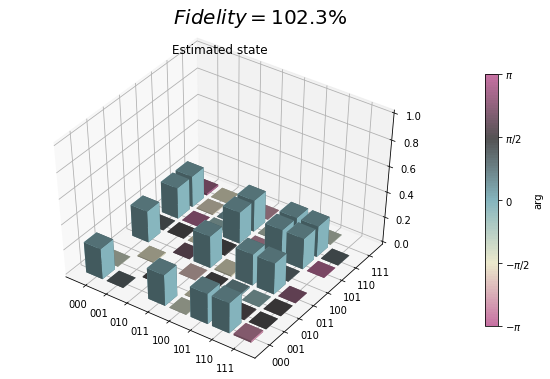

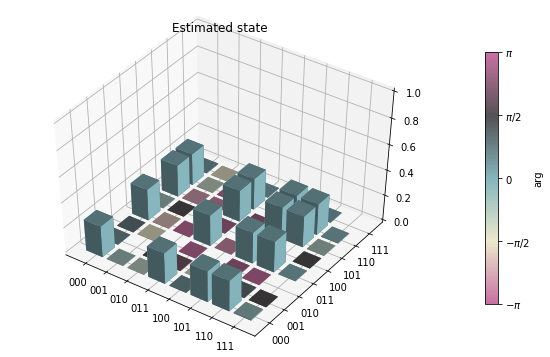

In [25]:
plot_state()